# WeatherPy

Analysis

Observed trend 1: Cities with latitude around degree 0 (i.e., equator), have the highest temperature. As the latitude increases toward degree 90 (i.e., north pole), the temperature decreases.

Observed trend 2: The distribution of humidity versus latitude is approximately uniform, which indicates that most probably there is no strong correlation between humidity and latitude.
    
Observed trend 3: There is no significant difference in wind speed of cities around equator.

In [47]:
# Import Dependencies
import requests
import json
import openweathermapy.core as owm
from config import api_key
from pprint import pprint
from citipy import citipy
import seaborn as sns
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [48]:
# Getting the base URL and units
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build a URL
url = f"{base_url}appid={api_key}&units={units}&q="

# Generate Cities List

In [70]:
# Create an empty list to hold the city names
city_names=[]

# Generate random latitude and longitude values
lat_arr = random.sample(list(np.arange(-90, 90,0.1)), 1500)
lng_arr = random.sample(list(np.arange(-180, 180,0.1)), 1500)

# loop through each combination of lat and lon to get the city names from citipy
for lat, lng  in zip(lat_arr, lng_arr):
    city = citipy.nearest_city(lat, lng)
    if city.city_name not in city_names:
        city_names.append(city.city_name)

# Perform API Calls

In [72]:
# Create empty lists to hold city names, cloudiness, country, date, humidity, lat, lng, max temperature and wind speed
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Loop through each city in city names list to get the response from open weathermapy
row_count = 0
for city in city_names:
    print(f"Processing record {row_count} | {city}")
    row_count+=1
    response = requests.get(url+city)
    print(response.url)
    response = response.json()
    # Error handling to skip the cities that are not found in OWM
    try:   
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])            
    except:
        print(f"{city} is not found. Skipping....")
        continue

Processing record 0 | salalah
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=salalah
Processing record 1 | taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=taolanaro
taolanaro is not found. Skipping....
Processing record 2 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=bluff
Processing record 3 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=sioux%20lookout
Processing record 4 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=hamilton
Processing record 5 | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=kodiak
Processing record 6 | camara de lobos
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d9

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=amazar
Processing record 56 | issum
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=issum
Processing record 57 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=chuy
Processing record 58 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=tasiilaq
Processing record 59 | vao
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=vao
Processing record 60 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=busselton
Processing record 61 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=new%20norfolk
Processing record 62 | bayan
http://api.

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=high%20level
Processing record 111 | manggar
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=manggar
Processing record 112 | cockburn harbour
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=cockburn%20harbour
cockburn harbour is not found. Skipping....
Processing record 113 | manokwari
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=manokwari
Processing record 114 | virginia beach
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=virginia%20beach
Processing record 115 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=torbay
Processing record 116 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?ap

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=jamestown
Processing record 166 | san carlos de bariloche
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=san%20carlos%20de%20bariloche
Processing record 167 | marcona
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=marcona
marcona is not found. Skipping....
Processing record 168 | matara
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=matara
Processing record 169 | bull savanna
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=bull%20savanna
Processing record 170 | arusha
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=arusha
Processing record 171 | apastovo
http://api.openweathermap.org/data/2.5/weather?appid=7b570

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=west%20bay
Processing record 221 | tagusao
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=tagusao
Processing record 222 | araouane
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=araouane
Processing record 223 | roquetas de mar
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=roquetas%20de%20mar
Processing record 224 | kendari
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=kendari
Processing record 225 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=mahebourg
Processing record 226 | suksun
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=suksun
Proc

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=matamoros
Processing record 277 | airai
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=airai
Processing record 278 | bisho
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=bisho
bisho is not found. Skipping....
Processing record 279 | teknaf
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=teknaf
Processing record 280 | buala
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=buala
Processing record 281 | guaiba
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=guaiba
Processing record 282 | angren
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=angren
Processing rec

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=ondorhaan
ondorhaan is not found. Skipping....
Processing record 332 | gunjur
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=gunjur
Processing record 333 | tambul
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=tambul
tambul is not found. Skipping....
Processing record 334 | acuna
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=acuna
acuna is not found. Skipping....
Processing record 335 | lolodorf
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=lolodorf
Processing record 336 | maragogi
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=maragogi
Processing record 337 | tambun
http://api.openweathermap.org/data/2.5/we

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=santa%20cruz%20de%20tenerife
Processing record 387 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=kudahuvadhoo
Processing record 388 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=puerto%20escondido
Processing record 389 | egvekinot
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=egvekinot
Processing record 390 | seara
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=seara
Processing record 391 | odweyne
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=odweyne
odweyne is not found. Skipping....
Processing record 392 | arman
http://api.openweathermap.org/data/2.5/weather?appid=7b570

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=swellendam
Processing record 442 | alappuzha
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=alappuzha
alappuzha is not found. Skipping....
Processing record 443 | ornskoldsvik
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=ornskoldsvik
Processing record 444 | carutapera
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=carutapera
Processing record 445 | arlit
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=arlit
Processing record 446 | krasnoarmeysk
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=krasnoarmeysk
Processing record 447 | kifri
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=homer
Processing record 497 | khandyga
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=khandyga
Processing record 498 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=thinadhoo
Processing record 499 | kathmandu
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=kathmandu
Processing record 500 | sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=sao%20felix%20do%20xingu
Processing record 501 | gangotri
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=gangotri
gangotri is not found. Skipping....
Processing record 502 | valley station
http://api.openweathermap.org/data/2.5/weather?appid=7b570103

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=samana
Processing record 551 | koslan
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=koslan
Processing record 552 | kinanah
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=kinanah
kinanah is not found. Skipping....
Processing record 553 | harper
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=harper
Processing record 554 | pembroke
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=pembroke
Processing record 555 | vibo valentia
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=vibo%20valentia
Processing record 556 | krasnogorsk
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=

http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=myitkyina
Processing record 605 | san policarpo
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=san%20policarpo
Processing record 606 | pundaguitan
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=pundaguitan
Processing record 607 | chitrakonda
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=chitrakonda
Processing record 608 | kamina
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=kamina
Processing record 609 | mananjary
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=mananjary
Processing record 610 | burica
http://api.openweathermap.org/data/2.5/weather?appid=7b570103f8d90d61702f430853affd86&units=imperial&q=burica

In [77]:
# Create a city data dataframe
city_data_pd = pd.DataFrame({"City":city_name,
            "Cloudiness":cloudiness,
             "Country": country,
             "Date": date,
             "Humidity": humidity,
             "Lat": lat,
             "Lng": lng,
             "Max_Temp": max_temp,
             "Wind_speed": wind_speed})

# Writing the city data to csv file
city_data_pd.to_csv("City Weather Data.csv")
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_speed
0,Salalah,20,OM,1521697800,61,17.01,54.10,80.60,4.70
1,Bluff,92,AU,1521701459,85,-23.58,149.07,72.87,14.12
2,Sioux Lookout,5,CA,1521698400,66,50.10,-91.92,24.80,3.36
3,Hamilton,40,CA,1521698400,54,43.26,-79.87,32.00,11.41
4,Kodiak,1,US,1521697980,80,39.95,-94.76,33.80,10.09


# Latitude vs Temperature Plot

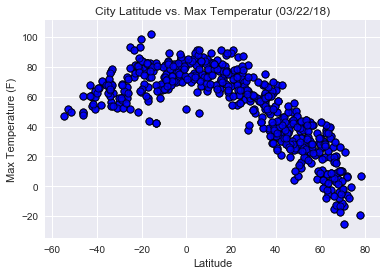

In [80]:
# Set the grey background
sns.set()

# Plot the scatter
plt.scatter(city_data_pd.Lat, city_data_pd.Max_Temp, color="Blue", edgecolors="black", alpha= 0.7, linewidths=1)

# Add Title, xlabel and ylabel
plt.title(f"City Latitude vs. Max Temperatur ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("Latitude vs Temperature.png")
# Display the plot
plt.show()

# Latitude vs. Humidity Plot

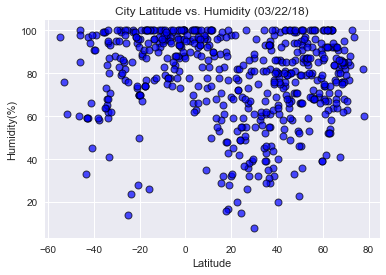

In [81]:
# Set the grey background
sns.set()

# The scatter plot
plt.scatter(city_data_pd.Lat,city_data_pd.Humidity, color="Blue",edgecolors="black", alpha=0.7, linewidths=1)

# Add title, xlabel and ylabel
plt.title(f"City Latitude vs. Humidity ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("Latitude vs Humidity.png")
# Display the plot
plt.show()

# Latitude vs. Cloudiness Plot

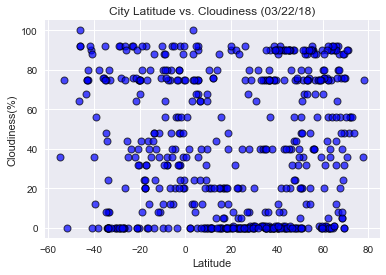

In [82]:
# Set the grey background
sns.set()

# The Scatter plot
plt.scatter(city_data_pd.Lat,city_data_pd.Cloudiness, color="Blue",edgecolors="black", alpha=0.7, linewidths=1)

# Add title, xlabel, ylabel
plt.title(f"City Latitude vs. Cloudiness ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("Latitude vs Cloudiness.png")
# Display the plot
plt.show()

# Latitude vs. Wind Speed Plot

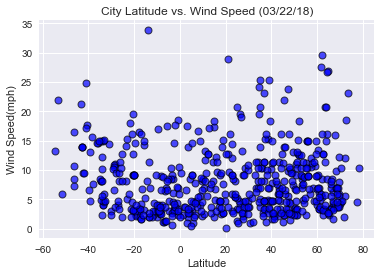

In [83]:
# Set the grey background
sns.set()

# The scatter plot
plt.scatter(city_data_pd.Lat, city_data_pd.Wind_speed, color="Blue",edgecolors="black", alpha=0.7, linewidths=1)

# Add title, xlabel, ylabel
plt.title(f"City Latitude vs. Wind Speed ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

# Save the figure
plt.savefig("Latitude vs Wind Speed.png")

# Display the plot
plt.show()